/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


Average transaction count: %s 0.6402510788544528
           txn_shares txn_volume
date                            
2017-11-29        0.0        0.0
2017-11-30       10.0    97753.0
2017-12-01        0.0        0.0
2017-12-02       10.0   108605.0
2017-12-03       10.0   108765.0
perf_stats:                   回测
年化收益率      1.703666
年化波动率      0.609099
夏普比率       2.773752
Calmar 比率  4.199758
Omega 比率   1.570038


/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/plotting.py:709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  perf_stats.loc[stat, column] = f"{np.round(float(value) * 100, 2):.2f}%"


开始日期,2017-11-29
结束日期,2024-12-17
总月数,84
,回测
年化收益率,170.37%
年化波动率,60.91%
夏普比率,2.77
Calmar 比率,4.20
Omega 比率,1.57
Sortino 比率,4.99
累计收益率,103789.21%


最差回撤期间,净回撤比率%,高点日期,低点日期,恢复日期,期间长度
0,40.57,2018-12-14,2019-06-26,2019-10-28,227
1,38.16,2021-08-03,2021-11-08,2022-01-22,124
2,34.58,2018-06-13,2018-07-24,2018-11-14,111
3,20.40,2024-06-05,2024-07-07,2024-09-07,68
4,20.13,2018-02-05,2018-03-05,2018-03-08,24


/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/seaborn/uti

Stress Events,mean,min,max
2018年下跌期,0.40%,-10.43%,11.63%


Top 10 long positions of all time,max
BTCUSD,2.83%


Top 10 short positions of all time,max
BTCUSD,-6.63%


Top 10 positions of all time,max
BTCUSD,6.63%


/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/pos.py:104: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longs = expos.where(expos.applymap(lambda x: x > 0))
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/pos.py:105: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shorts = expos.where(expos.applymap(lambda x: x < 0))
/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/plotting.py:346: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_holdings_by_month = df_holdings.resample('1M').mean()


           txn_shares txn_volume
date                            
2017-11-29        0.0        0.0
2017-11-30       10.0    97753.0
2017-12-01        0.0        0.0
2017-12-02       10.0   108605.0
2017-12-03       10.0   108765.0


/opt/miniconda3/envs/analysis/lib/python3.11/site-packages/pyfolio/plotting.py:1601: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_turnover_by_month = df_turnover.resample("M").mean()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

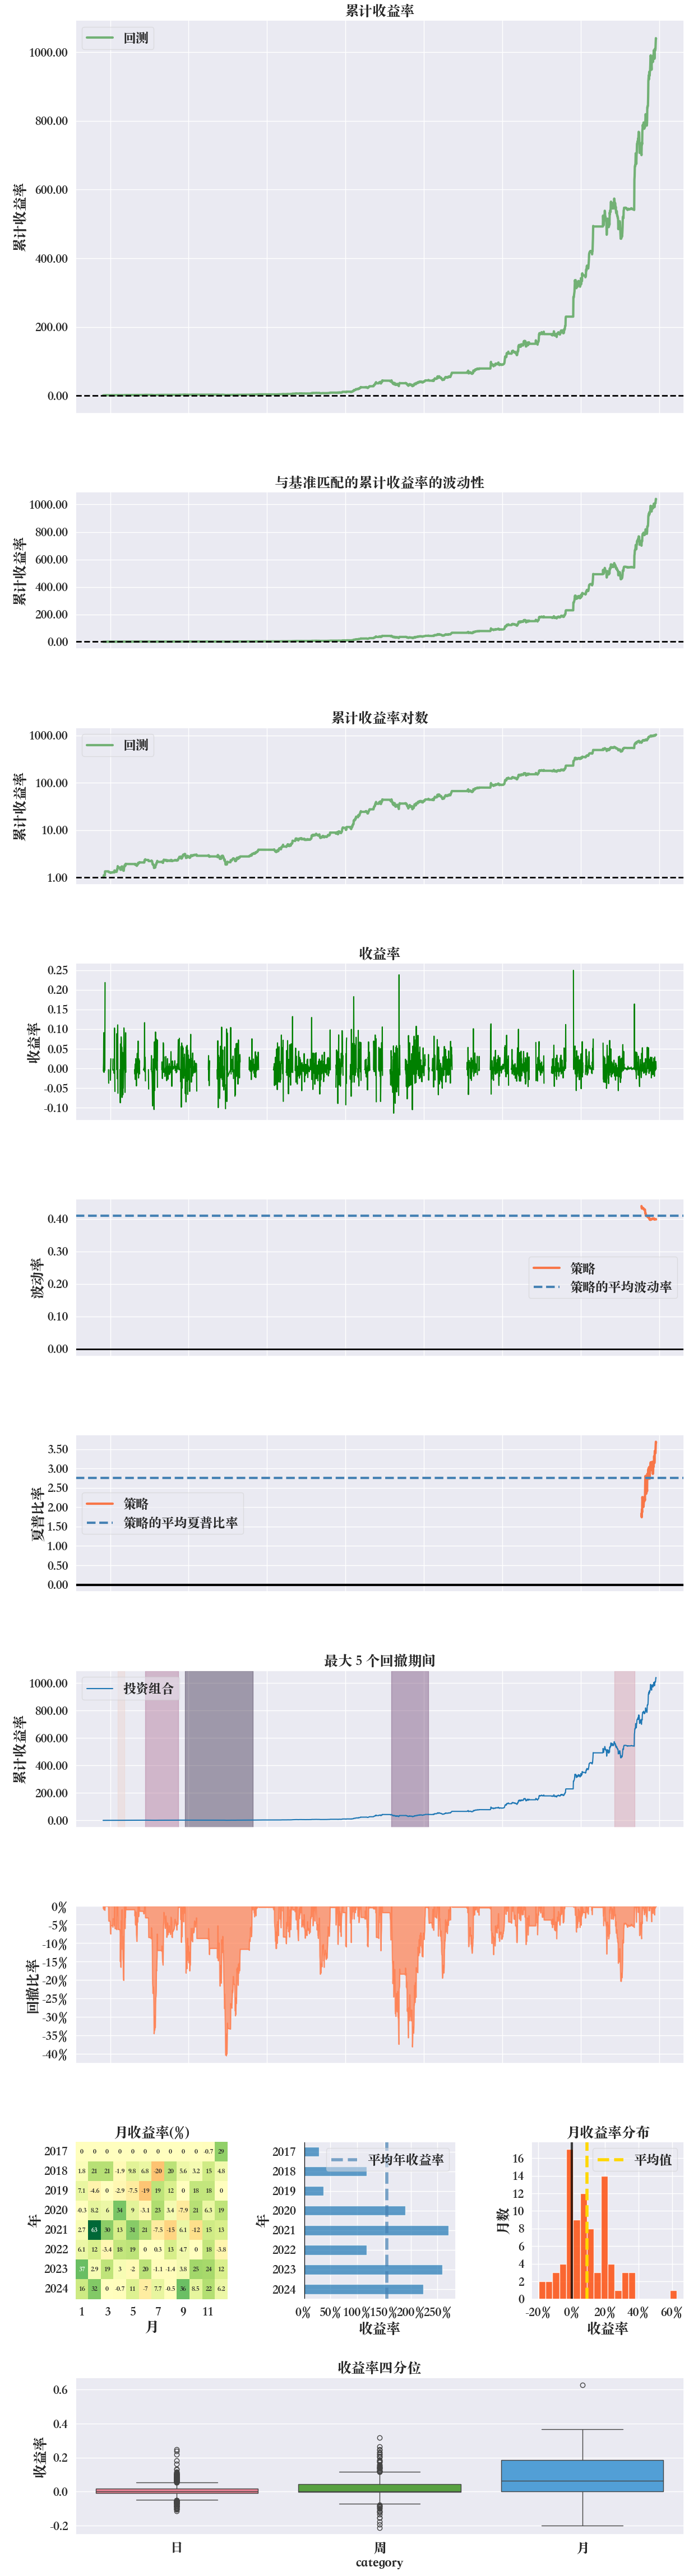

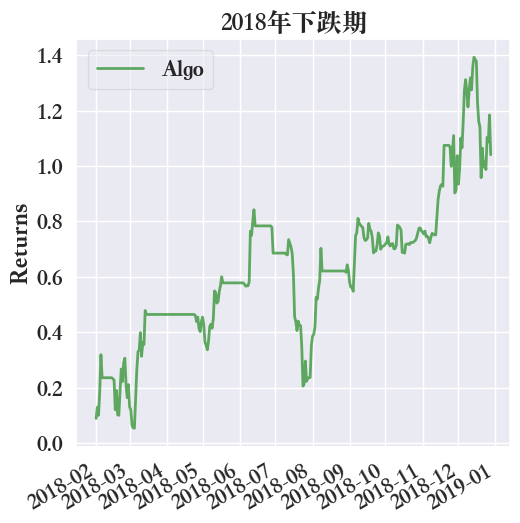

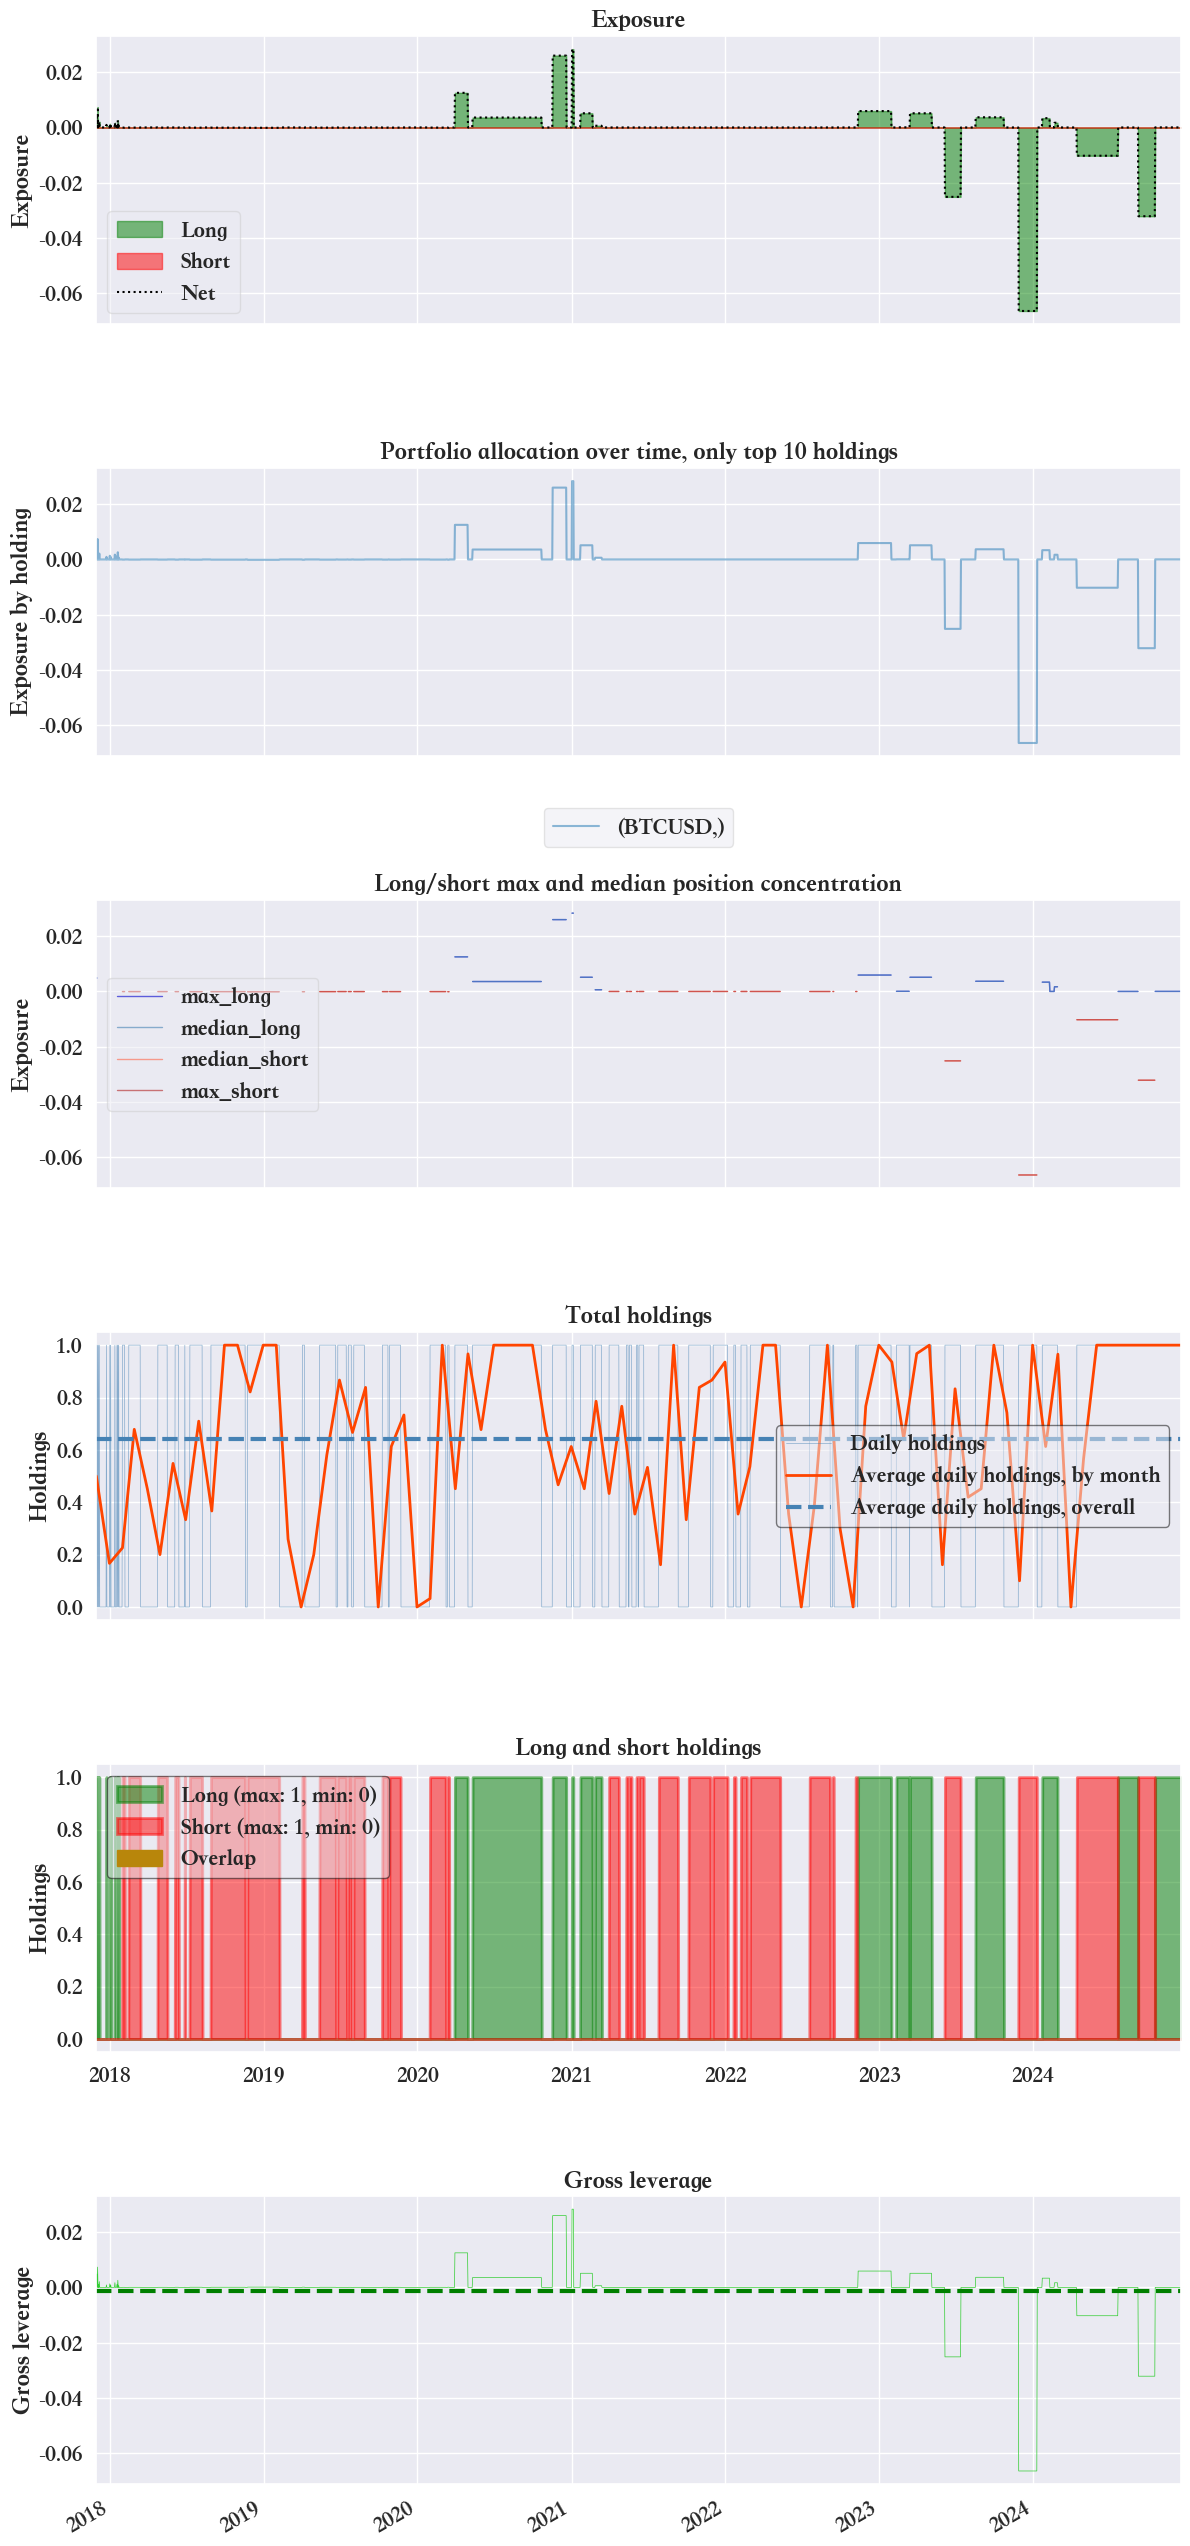

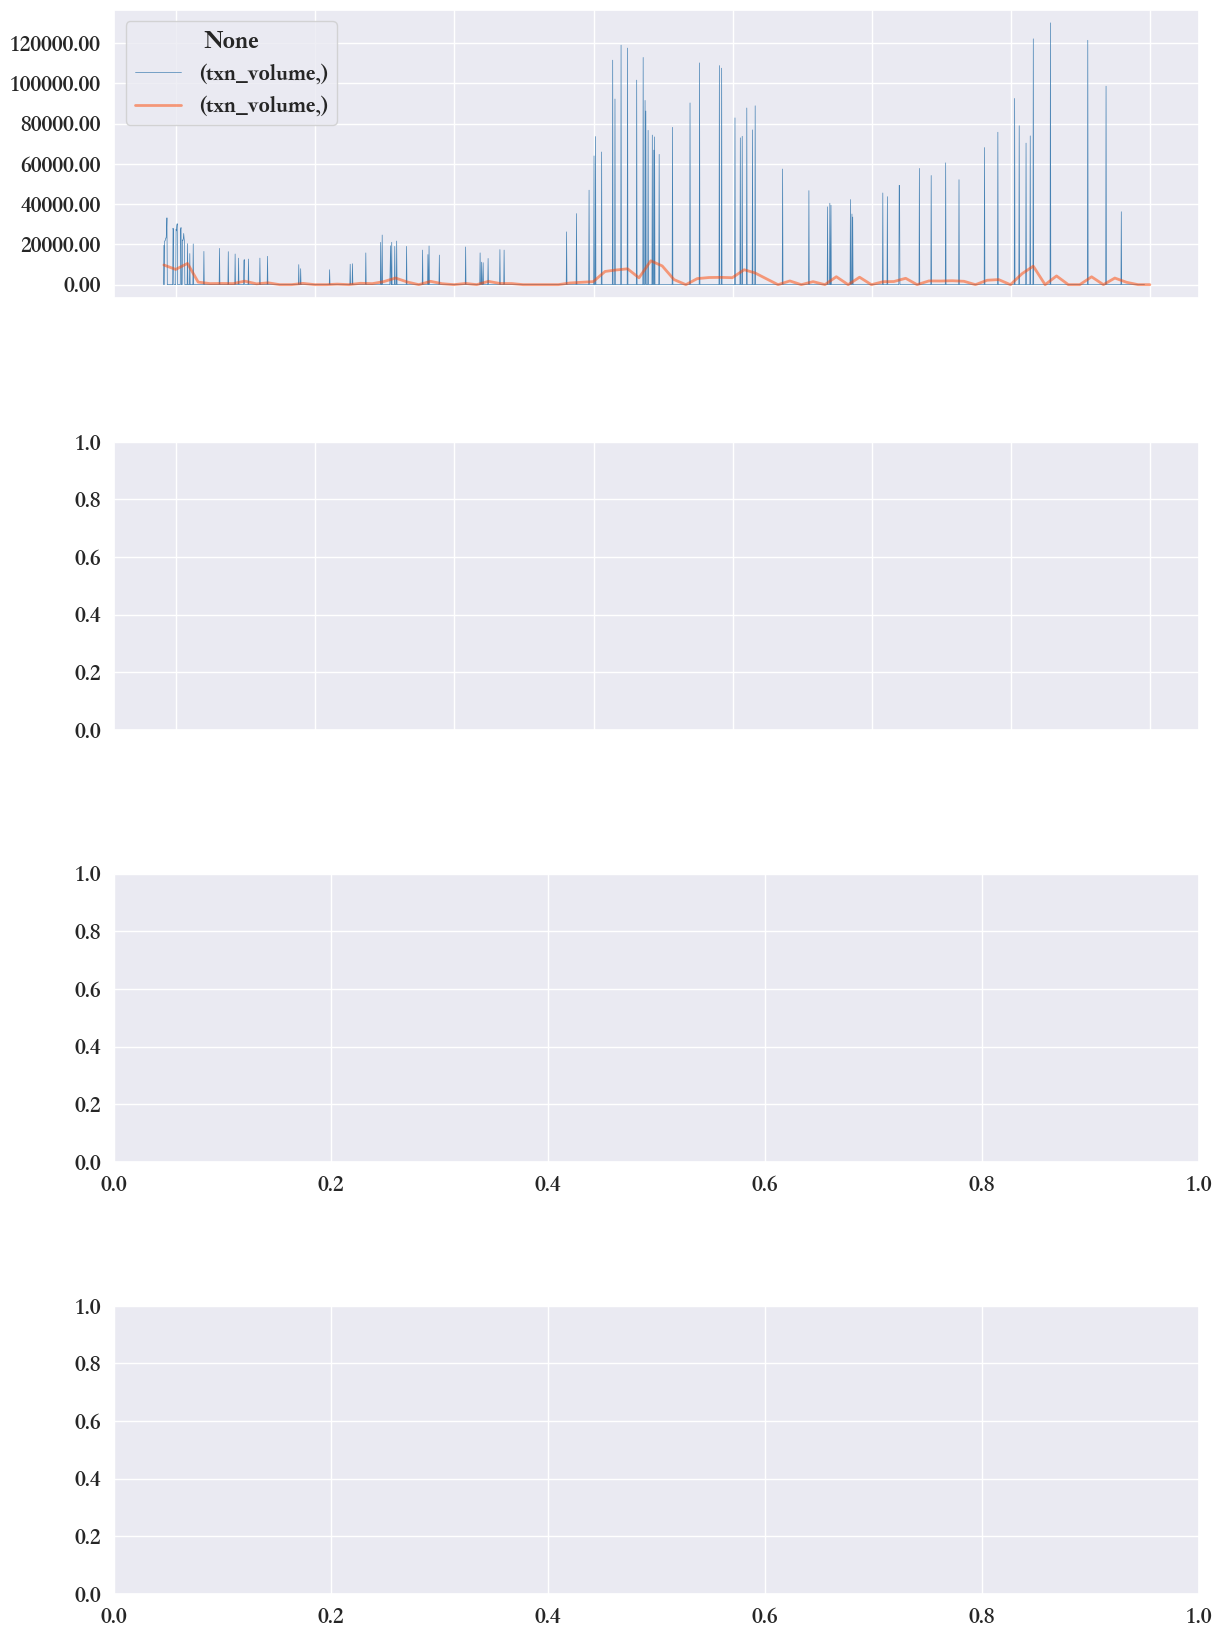

In [ ]:
# %%

import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

bitcoin_strategy_backtest = pd.read_csv('bitcoin_strategy_backtest.csv', index_col=0, parse_dates=True)
returns = bitcoin_strategy_backtest['returns']
#print(returns.head())
#pf.create_returns_tear_sheet(returns)
#plt.show()

bitcoin_strategy_backtest['positions'] = bitcoin_strategy_backtest['positions'].apply(lambda x: x.replace("'", '"'))
bitcoin_strategy_backtest['transactions'] = bitcoin_strategy_backtest['transactions'].apply(lambda x: x.replace("'", '"'))
bitcoin_strategy_backtest['transactions'] = bitcoin_strategy_backtest['transactions'].apply(lambda x: x.replace("datetime.", '"datetime.'))
bitcoin_strategy_backtest['transactions'] = bitcoin_strategy_backtest['transactions'].apply(lambda x: x.replace(")", ')"'))

positions = bitcoin_strategy_backtest[['positions', 'ending_cash']]
position_data = json.loads(positions.iloc[1, 0])

symbol = position_data[0]['symbol']
positions_edited = pd.DataFrame(0, index = positions.index, columns = [[symbol, 'cash']])
for index, row in positions.iterrows():
    position_data = json.loads(row['positions'])

    if position_data:
        positions_edited.loc[index, symbol] = position_data[0]['amount']   
    positions_edited.loc[index, 'cash'] = int(row['ending_cash'])
#print(positions_edited.head()) 

transactions = bitcoin_strategy_backtest[['transactions']]
transactions_edited = pd.DataFrame(np.nan, index = transactions.index, columns = [['amount', 'price', 'symbol']])
transactions_edited['symbol'] = transactions_edited['symbol'].astype(str)

for index, row in transactions.iterrows():
    #print('index: ', index, "row['transactions']: ", row['transactions'])
    transactions_data = json.loads(row['transactions'])
    if transactions_data:
        transactions_edited.loc[index, 'price'] = float(transactions_data[0]['price'])   
        transactions_edited.loc[index, 'amount'] = transactions_data[0]['amount']           
        transactions_edited.loc[index, 'symbol'] = symbol
    else:
        transactions_edited.loc[index, 'price'] = 0
        transactions_edited.loc[index, 'amount'] = 0
        transactions_edited.loc[index, 'symbol'] = symbol   
transactions_edited = transactions_edited.dropna()
#print(returns.head())
#print(positions.head())
#print(transactions_edited.dtypes)

pf.create_full_tear_sheet(returns,
                          positions=positions_edited,
                          transactions=transactions_edited,
                          slippage=1)
plt.show()